# Titanic Data Analysis
### By William Dew

# Question: 
## What factors could have determained if a passanger survived the Titanic sinking?

### Exploring the Data
We begin our exploring by loading our modules.  

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We abtained the titanic data from 
https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv

In [2]:
titanic = pd.read_csv('titanic_data.csv')

Lets look at a summary of the titanic data, and the top of the titanic dataframe.

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From this summary and brief glimpse of the head and tail we can see a couple different things:
- Age, Cabin, and Embarked have nulls
- Catigorical columns: Survived, Pclass, Sex, and Embarked (values that can be placed in a catigory)
- Numerical columns: PassengerId, Age, SibSp, Parch, and Fare (value to vary from sample to sample)
- PassengerId is a unique index and appears we can drop it as it will have no correlation with survival.

### Who Survived
We can see that out of the 891 passengers in our dataframe only 342 or 38% survived.

In [6]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
titanic['Survived'].mean()

0.3838383838383838

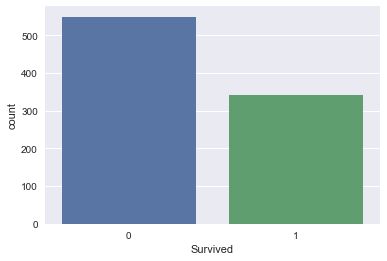

In [8]:
sns.countplot(titanic['Survived'])

### Pclass
Class seems to play a big role in determining if a passenger survived.  62% of people from first class survived followed by 47% from second class and third class coming in last at 24%.

In [9]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


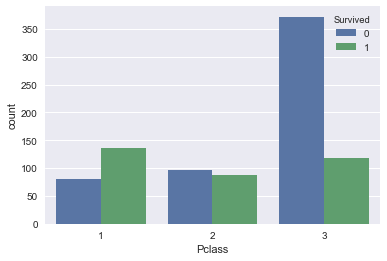

In [10]:
sns.countplot(titanic['Pclass'], hue=titanic['Survived'])

### Name
The name is unique to each person and is not useful in determining survival.  But the title of each person could coreleate to survival.  The Title of Mrs, Miss, and Master all have a 50%< chance of survival.

In [11]:
titanic['Name'].unique().size

891

Rare Titles were lumped into a catigory called 'Rare

In [12]:
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
titanic['Title'] = titanic['Title'].replace(['Dr.', 'Rev.', 'Mlle.', 'Major.', 'Col.', 'Capt.', 'Sir.', 'the', 'Don.', 'Jonkheer.', 'Ms.', 'Mme.', 'Lady.'], 'Rare')
titanic['Title'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Rare        27
Name: Title, dtype: int64

In [12]:
titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master.,0.575000
1,Miss.,0.697802
2,Mr.,0.156673
3,Mrs.,0.792000
4,Rare,0.444444


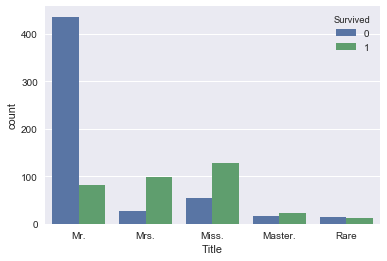

In [13]:
sns.countplot(titanic["Title"], hue=titanic["Survived"])

### Sex
Sex seems to be a big factor on the survival rate of a passenger.  Females had a 74% chance of surviving compared to 18% chance by males.  There are more males in the titanic data provide compared to females. (64% male, 35% female)

In [14]:
titanic['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [15]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


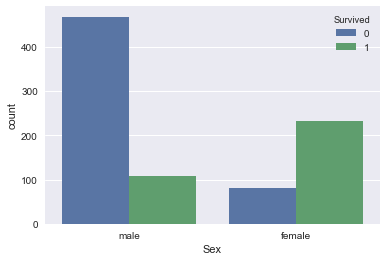

In [16]:
sns.countplot(titanic["Sex"], hue=titanic["Survived"])

### Age
The Age variable has a lot of nulls at 177.  If those are taken out then it seems that children under 19 years of age had the biggest survival rate at 48%.  And children seem to make up the most of the non null passengers at 164.  


In [17]:
titanic['Age'].isnull().sum()

177

In [18]:
titanic['Survived'].groupby(pd.qcut(titanic['Age'],5)).mean()

Age
[0.42, 19]    0.481707
(19, 25]      0.328467
(25, 31.8]    0.393701
(31.8, 41]    0.437500
(41, 80]      0.373239
Name: Survived, dtype: float64

In [19]:
pd.qcut(titanic['Age'],5).value_counts()

[0.42, 19]    164
(31.8, 41]    144
(41, 80]      142
(19, 25]      137
(25, 31.8]    127
Name: Age, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0B416D30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D0D9A90>], dtype=object)

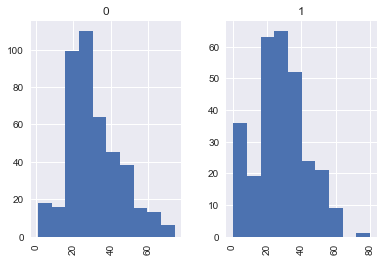

In [20]:
titanic.hist(column='Age', by='Survived')

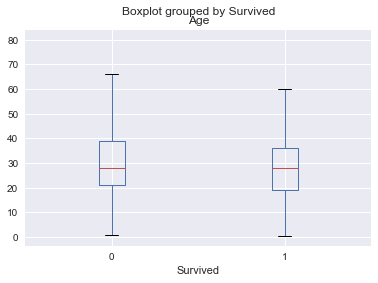

In [21]:
titanic.boxplot(column='Age', by='Survived')

### SibSb

SibSb doesn't seem to correlate to survival.

In [22]:
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Parch
Parch is not a very strong predicter of survival like SibSp.  

In [24]:
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [25]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Combining SibSp and Parch into Family
By combining these two week columns into a Family it indicates that if you had a  family you were likely to survive at 50%.

In [26]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic['Family'] = titanic['Family'] != 0 

In [27]:
titanic[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,False,0.303538
1,True,0.505650


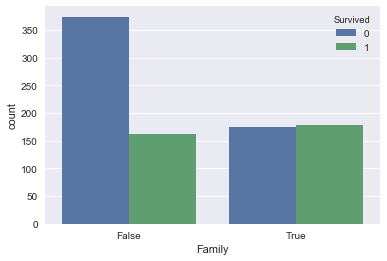

In [28]:
sns.countplot(titanic["Family"], hue=titanic["Survived"])

### Ticket
Tickets seem to be a random assortment of letters and numbers.  And there are duplicates amoung them (210).  The question to ask is there any distiguishing aspects of the ticket number that could corelate to survival?
1. We can look at the length of the ticket
2. We can look at what letter or number is first on each ticket

In [29]:
titanic['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [30]:
titanic["ticket_len"] = titanic["Ticket"].apply(lambda x: len(x))
titanic["ticket_len"].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: ticket_len, dtype: int64

In [31]:
titanic[["ticket_len", "Survived"]].groupby("ticket_len", as_index=False).mean()

,ticket_len,Survived
0,3,0.000000
1,4,0.366337
2,5,0.618321
3,6,0.319809
4,7,0.296296
5,8,0.539474
6,9,0.192308
7,10,0.341463
8,11,0.250000
9,12,0.400000


In [32]:
titanic["ticket_let"] = titanic["Ticket"].apply(lambda x: str(x)[0])
titanic["ticket_let"].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: ticket_let, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D433DF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D637EB0>], dtype=object)

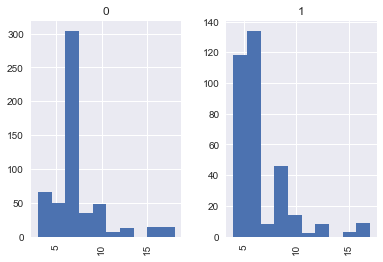

In [33]:
titanic.hist(column="ticket_len", by="Survived")

As we can see from the ticket length histogram if you had a ticket around 5 characters in lenght you were more likely to survive.

In [34]:
titanic[["ticket_let", "Survived"]].groupby("ticket_let", as_index=False).mean()

,ticket_let,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


### Fare

The fare ranged from 0 to $512.32.  We see passengers that paid a higher fare have a greater chance of surviving. 

In [37]:
pd.qcut(titanic["Fare"], 5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
[0, 7.854]           179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [36]:
titanic["Survived"].groupby(pd.qcut(titanic["Fare"], 5)).mean()

Fare
[0, 7.854]           0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64

### Cabin

When we look at the cabins we can see the first letter of the cabin number had a correlation with survival rate.  Some of the cabin letters have a big sample size but there are 687 null values so Cabin is not the best way to determine survival rate.

In [38]:
titanic["cabin_let"] = titanic["Cabin"].apply(lambda x: str(x)[0])
titanic[["cabin_let", "Survived"]].groupby("cabin_let", as_index=False).mean()

,cabin_let,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,T,0.000000
8,n,0.299854


In [39]:
titanic["cabin_let"].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_let, dtype: int64

### Embarked

The majority of passengers embarked from South Hampton but theses passangers had the lowest  survival rate.  The passangers from C had a better than 50% chance of surviving.  Where you embarked from has a corrilation with survival.

In [66]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
titanic[["Embarked", "Survived", "Pclass"]].groupby("Embarked", as_index=False).mean()

,Embarked,Survived,Pclass
0,C,0.553571,1.886905
1,Q,0.389610,2.909091
2,S,0.336957,2.350932


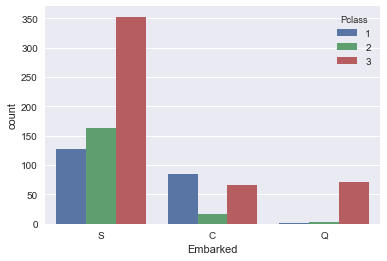

In [40]:
sns.countplot(titanic["Embarked"], hue=titanic["Pclass"])

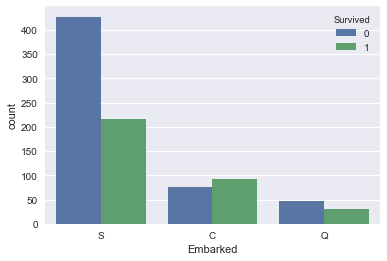

In [41]:
sns.countplot(titanic["Embarked"], hue=titanic["Survived"])

## Conclution

The columns with the biggest corrilation to survival are Sex, Age, Class, and Family.  If you were female you had a 74% chance of survial compared to 17% by men.  If you were under the age of 19 you had a 50% chance of surviving.  All other ages were around a 30-40% chance of survial.  If you were in the higher class you had a significant chance of survival.  Also if you were traveling with family you greatly increased your survival rate.  So looking at the data if you were a female under the age of 19 from first class and traveling with family you would have the greatest chance of survival from the titanic disaster.